<div style="display: flex; color:black">
    <img style="width:320px; height:150px;" src="unifor.jpg"> 
    <h1 style="color:black;font-size:38px;text-align: right">Projeto Análise Dados do Twitter</h1>      
</div>  
 
 <div>
    <h2>Curso: Mba em Ciência de Dados - Especialização</h2>
    <h2>Disciplina: Introdução a programação com Python</h2>
    <h2>Professor: Erneson Oliveira</h2>
    <h2>Aluno: Jairo Alves Cordeiro</h2>
 </div>  
    


 <h1 style="color:black;font-size:30px;text-align: left">Será que podemos comparar ideologias politicas a partir de tweets?</h1>   
<div style="display: flex; color:black">
    <img style="width:320px; height:200px;" src="capalula.png"> 
    <label style="color:black;font-size:30px;margin: 0 auto;">X</label>
    <img style="width:320px; height:200px;" src="capabolsanaro.png">     
</div>  

 <h1 style="color:black;font-size:30px;text-align: left">Ideologia política. Você é de direita ou de esquerda?</h1> 

 <h1 style="color:black;font-size:30px;text-align: left">1 - Importando as bibliotecas necessarias para analise dos tweets</h1> 

In [1]:
# Importando numpy
import numpy as np

# importando pandas para criação do DataFrame
import pandas as pd

#importando matplotlib para criação dos graficos
import matplotlib.pyplot as plt

#importando re para utilização de expressões regulares
import re

#importando unidecode remoção de acentos nas palavras
from unidecode import unidecode

#importando nltk para remoção do stopwords 
import nltk    
from nltk import tokenize   
stopwords = nltk.corpus.stopwords.words('portuguese')

#importando wordcloud para o grafico das palvras mais utilizadas
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# importando seaborn para criação de graficos 
import seaborn as sns



ModuleNotFoundError: No module named 'numpy'

<h1 style="color:black;font-size:30px;text-align: left">2 - Criação do DataFrame Geral dos Tweets do Lula e Bolsonaro</h1> 

In [2]:
arqBolsonaro = pd.read_json('jairbolsonaro.json')
arqLula = pd.read_json('LulaOficial.json')
dfBolsonaro = pd.DataFrame(data=arqBolsonaro)
dfLula = pd.DataFrame(data=arqLula)

<h1 style="color:black;font-size:30px;text-align: left">3 - Data do Primeiro Tweet do Lula</h1> 

In [3]:
primeiro_tweet_lula = min(dfLula['created_at'])
print ("Primeiro Tweet Lula")  
format(primeiro_tweet_lula, "%d/%m/%Y")

Primeiro Tweet Lula


'02/09/2014'

<h1 style="color:black;font-size:30px;text-align: left">4 - Data do Primeiro Tweet do Bolsonaro</h1> 

In [4]:
primeiro_tweet_bolsonaro = min(dfBolsonaro['created_at'])
print ("Primeiro Tweet Bolsonaro")  
format(primeiro_tweet_bolsonaro, "%d/%m/%Y")

Primeiro Tweet Bolsonaro


'01/04/2010'

<h1 style="color:black;font-size:30px;text-align: left">5 - Grafico Quantidade de Tweets de Lula e Bolsonaro</h1> 

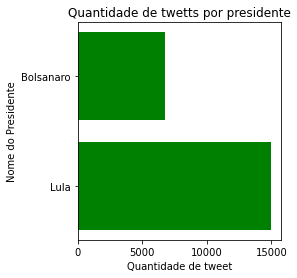

In [5]:
presidentes = ["Lula","Bolsanaro"]
qtdTweet = [len(dfLula),len(dfBolsonaro)]
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
plt.barh(presidentes,qtdTweet,color="green")
plt.title("Quantidade de twetts por presidente")
plt.xlabel("Quantidade de tweet")
plt.ylabel("Nome do Presidente")
plt.show()

<h1 style="color:black;font-size:30px;text-align: left">5.1 - Analise quantidade de Tweets</h1> 

<ul>
  <li>Lula criou seu primeiro tweet 4 anos depois de Bolsonaro.</li>
  <li>Apesar dessa diferença, Lula fez mais iterações que Bolsonaro, como podemos observar no grafico acima.</li>
  <li>Vejamos a seguir como foi a divisão no tempo desse tweets.</li>  
</ul>  


<h1 style="color:black;font-size:30px;text-align: left">6 - Criação do DataFrame com quantidade iterações de Lula por ano</h1> 

In [6]:
anoLula = dfLula['created_at'].apply(lambda x: str(x)[0:4])
DFAnoLula = pd.DataFrame(data=anoLula)
qtd_anos_lula= DFAnoLula['created_at'].value_counts().rename_axis('anos').reset_index(name='qtd')
qtd_anos_lula

,anos,qtd
0,2017,5311
1,2018,4710
2,2016,2074
3,2014,1515
4,2019,1265
5,2015,66
6,2020,20


<h1 style="color:black;font-size:30px;text-align: left">6.1 - Grafico com quantidade iterações de Lula por ano</h1> 

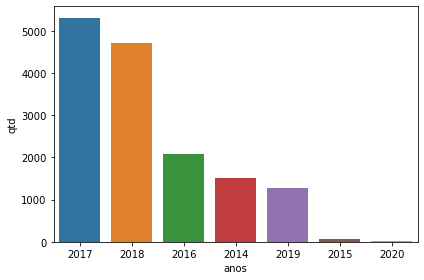

In [7]:
#criando uma figure, axes
fig, ax = plt.subplots()
#criando o gráfico de barras 
sns.barplot(x=qtd_anos_lula.anos, y=qtd_anos_lula['qtd'], ax=ax, data=qtd_anos_lula)
#otimizar espaço da figure
fig.tight_layout();

<h1 style="color:black;font-size:30px;text-align: left">7 - Criação do DataFrame com quantidade iterações de Bolsonaro por ano</h1> 

In [8]:
anoBolsonaro = dfBolsonaro['created_at'].apply(lambda x: str(x)[0:4])
DFAnoBolsonaro = pd.DataFrame(data=anoBolsonaro)
qtd_anos_Bolsonaro= DFAnoBolsonaro['created_at'].value_counts().rename_axis('anos').reset_index(name='qtd')
qtd_anos_Bolsonaro

,anos,qtd
0,2019,2305
1,2018,1616
2,2017,1014
3,2016,868
4,2015,435
5,2014,269
6,2013,193
7,2010,47
8,2020,34
9,2012,12


<h1 style="color:black;font-size:30px;text-align: left">7.1 - Grafico com quantidade iterações de Bolsonaro por ano</h1> 

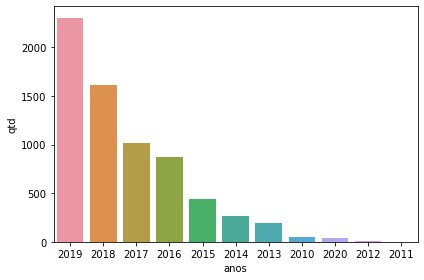

In [9]:
#criando uma figure, axes
fig, ax = plt.subplots()
#criando o gráfico de barras 
sns.barplot(x=qtd_anos_Bolsonaro.anos, y=qtd_anos_Bolsonaro['qtd'], ax=ax, data=qtd_anos_Bolsonaro)
#otimizar espaço da figure
fig.tight_layout();


<h1 style="color:black;font-size:30px;text-align: left">8 - Analise dos tweets por anos de Lula e Bolsonaro</h1> 
<ul>
  <li>Os dois fizeram suas maiores itreações no ano de 2018, onde houve uma grande disputa politica 
    entre o PT(partido de Lula) e PSL (partido de Bolsonaro).</li>
  <li>Podemos ver a crescente iteração no perfil de Lula, partir do ano de 2016, ano em que foi consumado o impeachment de Dilma Rousseff.</li>
  <li>Bolsonaro inicou uma forte iteração no 2018, ano em que ele ganhou força no cenario politico com suas ideias de "antipetismo", combate a corrupção e maior controle na segurança do pais</li>  
</ul>  


<h1 style="color:black;font-size:30px;text-align: left">9 - Criação de funções auxiliares para limpeza das palavras e tweets</h1> 

In [10]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def remove_caractere(string):
    string = re.sub('[1234567890!)(%@#$🤔🤥👺🥁🚴‍🚨🚩🚴‍❤\ ",|\?|\.|\!|\/|\;|\:]', '', string)
    return string

<h1 style="color:black;font-size:30px;text-align: left">10 - Tratamento e limpeza dos tweets e palavras mencionadas pelo Lula</h1> 

In [11]:
palavrasLula = dfLula['full_text'].apply(lambda x: x.split())
texto = "https"
novo_conjunto = []
for a in palavrasLula:
    nova_lista = [] 
    for b in a:
       nova_lista.append(b.split(', '))
    novo_conjunto.append(nova_lista)
a = novo_conjunto
saida = np.concatenate((a))
# print(saida)
novo_conjunto2 = []
artigos = ['-','a','as','a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 
           'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 
           'v', 'w', 'x', 'y', 'z','p','c','q','das','aos','ao','e','i','o',
           'os','pela','pelo','como','u','do','dos','de','se','por','da','em',
           'que','na','no','para','com','um','uma','mais',
           '1273078','1','2','3','4','5','6','7','8','9','stuckert','ricardo']
for a in saida:
    nova_lista2 = [] 
    for b in a:
         b = unidecode(b) 
         b = remove_caractere(b)
         b = b.lower()      
         if b in stopwords:       
            b = remove_caractere(b) 
         elif b in artigos:
            b = remove_caractere(b)
         elif b[0:5] == texto: 
            b = remove_caractere(b)
         elif b and (not b.isspace()):
            nova_lista2.append(remove_emoji(b))
            novo_conjunto2.append(nova_lista2)
a2 = novo_conjunto2
saida2 = filter(None, a2)
DFLula = pd.DataFrame(data=saida2)


<h1 style="color:black;font-size:30px;text-align: left">11 - DataFrame com as 50 maiores palavras mencionadas pelo Lula</h1> 

In [12]:
DFLula[0].value_counts().iloc[:50]

lula                  5341
nao                   4449
pais                  1728
brasil                1492
povo                  1327
lulapelobrasil        1178
ser                    987
presidente             933
gente                  925
pra                    844
sao                    739
haddad_fernando        720
fazer                  719
vai                    717
agora                  711
ja                     655
governo                652
ter                    637
pt                     636
porque                 635
anos                   633
hoje                   613
vivo                   600
dia                    593
voces                  570
contra                 557
so                     555
estao                  548
aqui                   537
sobre                  531
candidato              518
haddad                 513
pessoas                477
vamos                  477
lulaporminasgerais     472
todos                  468
lulalivre              462
p

<h1 style="color:black;font-size:30px;text-align: left">12 - WordCloud com as palavras do Lula</h1> 

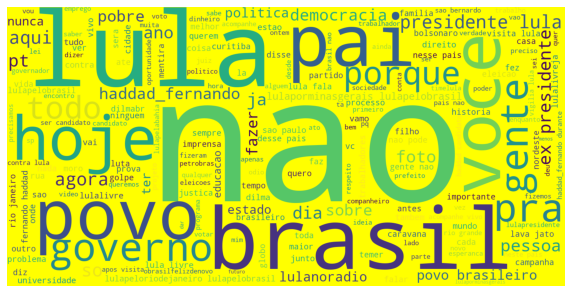

In [13]:
all_summary = " ".join(s for s in DFLula[0])

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="yellow",
                      width=1600, height=800).generate(all_summary)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);

<h1 style="color:black;font-size:30px;text-align: left">13 - Considerações sobre as palavras mencionadas por Lula</h1> 
<ul>
  <li>Em suas maiores menções Lula foca muito em seu nome, usando sua força politica para melhorar a imagem do PT, onde ficou bastante arranhada no periodo de 2016 a 2018(ano inclusive de um grande aumento de interações, como observamos no grafico por ano).</li>
  <li>Observamos também o apoio as seus dois principais discipulos politicos, Fernando Haddad e Dilma Rousseff.</li>
  <li>Uso muito forte de palavras populitas como "povo","brasileiro","pobre"</li>  
</ul>  

<h1 style="color:black;font-size:30px;text-align: left">14 - Tratamento e limpeza dos tweets e palavras mencionadas pelo Bolsonaro</h1> 

In [14]:
palavrasBolsonaro = dfBolsonaro['full_text'].apply(lambda x: x.split())
anoBolsonaro = dfBolsonaro['created_at'].apply(lambda x: str(x)[0:4])
texto_Bolsonaro = "https"
novo_conjunto_Bolsonaro = []
for c in palavrasBolsonaro:
    nova_lista_Bolsonaro = [] 
    for d in c:
       nova_lista_Bolsonaro.append(d.split(', '))
    novo_conjunto_Bolsonaro.append(nova_lista_Bolsonaro)
z = novo_conjunto_Bolsonaro
saida_Bolsonaro = np.concatenate((z))
# print(saida)
novo_conjunto2_Bolsonaro = []
artigosBolsonaro = ['-','a','as','a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 
           'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 
           'v', 'w', 'x', 'y', 'z','p','c','q','das','aos','ao','e','i','o',
           'os','pela','pelo','como','u','do','dos','de','se','por','da','em',
           'que','na','no','para','com','um','uma','mais',
           '1273078','1','2','3','4','5','6','7','8','9','stuckert','ricardo']
for f in saida_Bolsonaro:
    nova_lista2_Bolsonaro = [] 
    for g in f:
         g = unidecode(g) 
         g = remove_caractere(g)
         g = g.lower()      
         if g in stopwords:       
            g = remove_caractere(g)
         elif g in artigosBolsonaro:
            g = remove_caractere(g)
         elif g[0:5] == texto_Bolsonaro: 
            g = remove_caractere(g)
         elif g and (not g.isspace()):
            nova_lista2_Bolsonaro.append(remove_emoji(g))
            novo_conjunto2_Bolsonaro.append(nova_lista2_Bolsonaro)
a2_Bolsonaro = novo_conjunto2_Bolsonaro
saida2_Bolsonaro = filter(None, a2_Bolsonaro)
# saida2 = a2
DFBolsonaro = pd.DataFrame(data=saida2_Bolsonaro)




<h1 style="color:black;font-size:30px;text-align: left">15 - DataFrame com as 50 maiores palavras mencionadas pelo Bolsonaro</h1> 

In [15]:
DFBolsonaro[0].value_counts().iloc[:50]

brasil          1261
bolsonaro        809
nao              800
todos            590
governo          387
sobre            365
obrigado         349
sao              341
abraco           319
hoje             308
pt               298
grande           287
dia              277
jair             273
pais             240
presidente       236
contra           233
via              226
ser              215
sempre           203
vamos            195
ja               189
ha               185
bolsonarosp      180
economia         175
boa              168
esquerda         168
verdade          164
parabens         161
forte            161
estado           158
anos             157
ministro         156
tudo             154
ate              154
bom              151
bem              151
paulo            149
nacional         147
ano              146
seguranca        146
deus             146
parte            145
sera             142
trabalho         141
liberdade        141
so               140
rio          

<h1 style="color:black;font-size:30px;text-align: left">16 - WordCloud com as palavras do Bolsonaro</h1> 

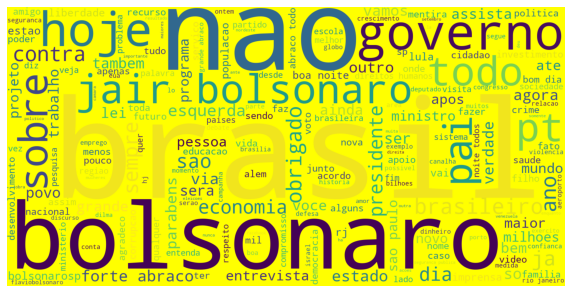

In [16]:
all_summary = " ".join(s for s in DFBolsonaro[0])

wordcloud_Bolsonaro = WordCloud(stopwords=stopwords,
                      background_color="yellow",
                      width=1600, height=800).generate(all_summary)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud_Bolsonaro, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud_Bolsonaro);

<h1 style="color:black;font-size:30px;text-align: left">17 - Considerações sobre as palavras mencionadas por Bolsonaro</h1> 
<ul>
  <li>Em suas maiores menções Bolsonaro foca muito no nome do Brasil e tenta convecer seus eleitores 
      com o seu Slogan "O Brasil acima de tudo. Deus acima de todos".</li>
  <li>Bolsonaro usa muito o seu nome como solução para os maiores problemas enfretados pelo Brasil no ultimos anos ( economia e anti-petismo).</li>
  <li>Uso muito forte das religiões e temas de segurança.</li>  
</ul>  

<h1 style="color:black;font-size:30px;text-align: left">18 - Considerações Finais</h1> 
<h2>
No começo do trabalho podemos observar que apesar de Lula esta mais tempo no twitter, ele não soube utilizar a ferramenta da mesma maneira em que o atual Presidente Jair Bolsanaro. 
Após o impeachment de Dilma Rousseff no ano de 2016, Bolsonaro começou a usar essa mídia social para criar um verdadeiro exercito de seguidores e polarizar a política no pais. Hoje existe o PT e o anti-petismo. Com as suas promessas de campanhas,foram aumentando a sua popularidade e enfraquecendo ainda mais o PT e a figura do Lula e dos candidatos apoiados por ele.
Ideologia política. Você é de direita ou de esquerda?
Creio que através dessa analise pode sim identificar uma diferença ideológica entre esses dois personagens e a grande divisão que houve no pais partir de 2018, ano da eleição de Jair Bolsonaro como presidente do pais.
uma curiosidade desse meu trabalho, as considerações das palavras foram exatamente o numero dos candidatos do PT(Fernando haddad) e Bolsonaro do PSL.     
</h2>